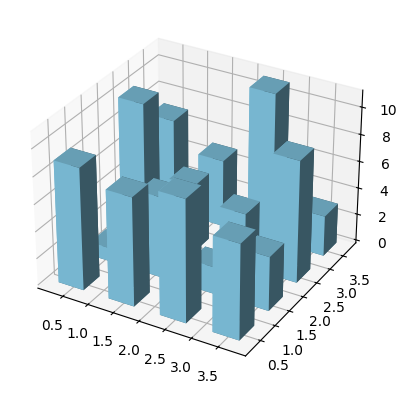

In [4]:
# 2Dのヒストグラムを3D化してプロットする
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# 乱数生成時のシード(種)を固定
np.random.seed(1)
# 一様乱数 (0.0 – 1.0) の間のランダムな数値を
# 2行×100列で出力し、4倍してx,yに代入
x, y = np.random.rand(2, 100) * 4
# 2次元のヒストグラムを計算する
hist, xedges, yedges = np.histogram2d(
    x,       # x値の配列
    y,       # y値の配列
    bins=4,  # 2つの次元(x,y)それぞれのビンの数
    range=[[0, 4], [0, 4]] # 2つの次元それぞれのビンの左端と右端
)

# 16本のバーのアンカー(配置するときの基準座標)を作成
# 2次元の格子座標を生成
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25,
                        yedges[:-1] + 0.25)
xpos = xpos.flatten('F')   # 2次元配列を列優先'F'で1次元配列に変換
ypos = ypos.flatten('F')   # 2次元配列を列優先'F'で1次元配列に変換
zpos = np.zeros_like(xpos) # xposと同じ形状のゼロ配列を生成

# 16本のバーの幅、奥行き、高さを作成
# zposと同じ形状の要素が0.5の配列を生成
dx = 0.5 * np.ones_like(zpos)
# dxをdyにコピー
dy = dx.copy()
# 2次元配列histを行優先'C'で1次元配列に変換
dz = hist.flatten('C')

# Figureを生成
fig = plt.figure()
# Axes3Dを配置
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(xpos,# xのアンカーポイント
        ypos, # yのアンカーポイント
        zpos, # zのアンカーポイント
        dx,   # バーの幅
        dy,   # バーの奥行
        dz,   # バーの高さ
        color='skyblue',  # バーのカラー
        zsort='average'   # z軸を平均値でソートする
        )

plt.show()